In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import tracemalloc

In [1]:
!pip install nbconvert

In [3]:
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations=5):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'jaccard') #Step 2
     
    #Classifying points in clusters based on centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids
            temp_cent = x[points==idx][np.argmin(cdist(x[points==idx], x[points==idx] ,'jaccard').sum(axis=0))]
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'jaccard')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,centroids

In [4]:
def kmean_inertia(data,k=5,max_iter=10):
        k_means=kmeans(data,k,max_iter)
        cluster=k_means[0]
        centroids=k_means[1]
        Inertia=0
        for i in range(k):
            cluster_k=data[cluster==i]
            cen_k = centroids[i]
            #clus = cluster[i]
            Inertia+=cdist(cluster_k,[cen_k] ,'jaccard').sum(axis=0)
        return Inertia
                
def optimize(data,m,max_iter=10):
    x = []
    for i in range(1,m):
        x.append(kmean_inertia(data,k=i,max_iter=10))
    return x

In [5]:
from google.colab import files
files.upload()

Saving docword.kos.txt to docword.kos (1).txt


{'docword.kos.txt': b'1 61 2\n1 76 1\n1 89 1\n1 211 1\n1 296 1\n1 335 1\n1 404 1\n1 441 1\n1 454 2\n1 463 1\n1 555 1\n1 593 1\n1 779 1\n1 841 2\n1 913 1\n1 983 1\n1 1116 1\n1 1140 1\n1 1206 2\n1 1219 2\n1 1263 1\n1 1266 1\n1 1267 1\n1 1297 2\n1 1298 2\n1 1316 1\n1 1323 2\n1 1434 1\n1 1534 1\n1 1535 1\n1 1683 1\n1 1715 1\n1 1837 2\n1 1901 2\n1 1919 1\n1 2033 1\n1 2101 1\n1 2111 1\n1 2275 1\n1 2403 1\n1 2640 2\n1 2701 1\n1 2742 1\n1 2953 1\n1 3005 2\n1 3007 2\n1 3112 1\n1 3117 1\n1 3142 1\n1 3219 3\n1 3238 2\n1 3282 2\n1 3310 1\n1 3350 1\n1 3399 1\n1 3420 3\n1 3452 1\n1 3516 1\n1 3534 1\n1 3581 1\n1 3708 1\n1 3745 1\n1 3806 1\n1 3873 1\n1 3929 5\n1 3973 1\n1 4113 1\n1 4143 1\n1 4196 1\n1 4301 2\n1 4347 1\n1 4489 1\n1 4497 4\n1 4560 1\n1 4565 1\n1 4712 1\n1 4735 1\n1 4861 1\n1 5004 1\n1 5017 1\n1 5114 1\n1 5156 1\n1 5185 2\n1 5189 1\n1 5241 1\n1 5262 1\n1 5287 1\n1 5408 1\n1 5517 1\n1 5561 1\n1 5728 1\n1 6021 1\n1 6429 1\n1 6613 1\n1 6622 1\n1 6659 1\n1 6662 2\n1 6689 4\n1 6724 1\n1 6732 

In [6]:
kos_txt = pd.read_csv("docword.kos.txt", delimiter=" ", names=['DocID', 'WordID', 'Freq'])

In [7]:
kos_txt.head()

DocID  WordID  Freq
0      1      61     2
1      1      76     1
2      1      89     1
3      1     211     1
4      1     296     1

In [8]:
kos_DocID_count=kos_txt['DocID'].max()
kos_WordID_count=kos_txt['WordID'].max()

In [9]:
kos_matrix=np.zeros([kos_WordID_count,kos_DocID_count])  

In [10]:
for i in range(kos_txt.shape[0]):
  d_pos = kos_txt.DocID[i]
  w_pos = kos_txt.WordID[i]
  kos_matrix[w_pos-1][d_pos-1]=kos_txt.Freq[i]

In [11]:
kos_matrix_sparse=np.where(kos_matrix==0,0,1)  
kos_matrix_sparse.shape

(6906, 3430)

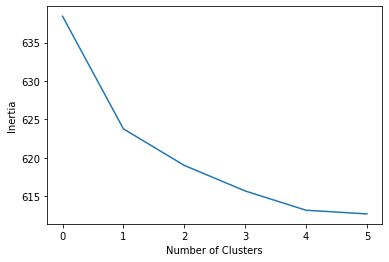

CPU times: user 5min 6s, sys: 629 ms, total: 5min 7s
Wall time: 5min 8s


In [15]:
%%time
y=optimize(np.transpose(kos_matrix_sparse)[0:3430],7,50)
plt.plot(list(range(0,6)),y)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [16]:
label=kmeans(np.transpose(kos_matrix_sparse)[0:3430],3,20)
label

(array([0, 0, 1, ..., 0, 2, 2]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [17]:
kos_finalclustering=pd.DataFrame(label[0])
kos_finalcentroids=pd.DataFrame(label[1])

In [18]:
kos_finalclustering.to_csv("kos_finalclustering.csv")
kos_finalcentroids.to_csv("kos_finalcentroids.csv")

In [19]:
files.download('kos_finalclustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
files.download('kos_finalcentroids.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>